# Neural Network Feed-Forward

### Uma rede neural feed-forward será treinada para o reconhecimento de dígitos manuscristos em imagens. A base de dados [MNIST](http://yann.lecun.com/exdb/mnist/) será utilizada para o treinamento da rede neural. A base de dados foi obtida por meio da biblioteca [PyTorch](https://pytorch.org/docs/stable/torchvision/datasets.html).

### Bibliotecas a serem utilizadas

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Importação dos dados da base MNIST

In [2]:
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


### Preparação dos dados: dados serão analisados em bateladas de 10 amostras

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

### Implementação do modelo / arquitetura de rede neural a ser utilizado
Optou-se por uma rede neural feedforward  de 4 camadas de unidades de processamento

In [4]:
class Net(nn.Module):
    # definição da estrutura das camadas
    def __init__(self):
        super().__init__()
        # imagens analisadas possuem dimensão 28x28 pixels
        # logo os dados de entrada são vetores de dimensão (1, 28x28) = flatten image
        self.fc1 = nn.Linear(28*28, 64) # camada oculta 1: 64 unidades de processamento
        self.fc2 = nn.Linear(64, 64) # camada oculta 2: 64 unidades de processamento
        self.fc3 = nn.Linear(64, 64) # camada oculta 3: 64 unidades de processamento
        self.fc4 = nn.Linear(64, 10) # camada de saída: 10 unidades de processamento
        # amotras são classificadas por meio de 10 classes (0,1,2,3,4,5,6,7,8,9) 
        # o mesmo número de unidades de saída

    # implementação da propagação forward  
    def forward(self, x):
        # amostra x é propagada de camada em camada
        # para 3 primeiras camadas ocultas a função de ativação ReLU é utilizada
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # para a camada de saída utiliza-se a função de ativação LogSoftmax, comum em problemas de classificação
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

    # pytorch: valores dos parâmetros são iniciados randomicamente utilizando distribuições uniformes

### Iniciação do modelo de rede neural implementado

In [5]:
net = Net()

### Escolha do algoritmo de otimização
Opta-se pelo uso do algoritmo de otimização Adam junto ao algoritmo de backprogation

In [6]:
optimizer = optim.Adam(net.parameters(), lr=0.001) # taxa de aprendizado lr = 0.001

### Treinamento da rede neural 

In [8]:
from tqdm import tqdm
loss_log = []
for epoch in tqdm(range(3)): # 3 passagens sobre todas as amostras de treinamento são realizadas
    total_loss = 0
    for data in trainset: # iteração da propagação de amostras de treinamento
        X, y = data # amostras de treinamento 
        net.zero_grad() # zera os valores de gradiente da rede neural
        # propagação forward
        output = net(X.view(-1, 28*28)) 
        # cálculo do erro das repostas geradas na propagação forward
        loss = F.nll_loss(output, y) # opta-se pelo uso da função erro Negative Log Likelihood
        							 # para problemas de classificação
        # propagação backward
        # pytroch: gradientes são calculados automaticamente durante a propagação forward
        loss.backward() 
        # ajuste dos valores dos parâmetros pesos e bias
        optimizer.step() # algoritmo Adam otimiza os valores dos parâmetros pela propagação dos gradientes da rede 
        total_loss += loss
    # valores de erro
    loss_log.append(total_loss.item())

100%|████████████████████████████████████████████| 3/3 [02:24<00:00, 48.20s/it]


### Performance durante treinamento

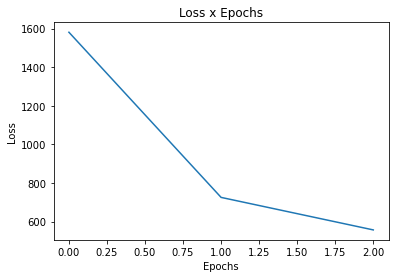

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_log)), loss_log)
plt.title("Loss x Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Teste da rede neural

In [11]:
correct = 0
total = 0
# desativa o cálculo dos gradientes
with torch.no_grad():
    for data in testset: # iteração da propagação das amostras de teste
        X, y = data # amostras de teste
        output = net(X.view(-1, 28*28)) # respostas geradas pela rede neural
        # checagem de reposta gerada está correta
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
# Acurácia:  
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.965


### Exemplos de Classificação

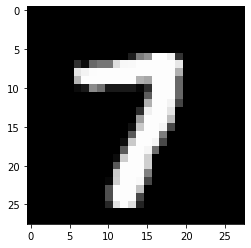

tensor(7)


In [18]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28), cmap='gray')
plt.show()
print(torch.argmax(net(X[0].view(-1,784))))

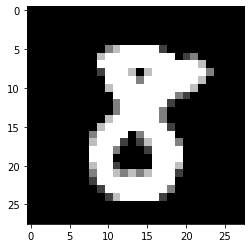

tensor(8)


In [22]:
plt.imshow(X[1].view(28,28), cmap='gray')
plt.show()
print(torch.argmax(net(X[1].view(-1,784))))

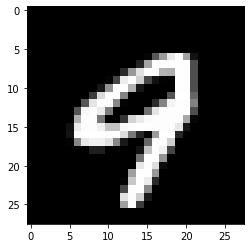

tensor(4)


In [24]:
plt.imshow(X[2].view(28,28), cmap='gray')
plt.show()
print(torch.argmax(net(X[2].view(-1,784))))

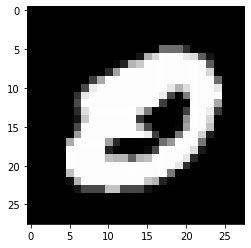

tensor(0)


In [25]:
plt.imshow(X[3].view(28,28), cmap='gray')
plt.show()
print(torch.argmax(net(X[3].view(-1,784))))